In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from qiime2 import Artifact

from skbio.diversity import beta_diversity, alpha_diversity
from skbio.stats import distance, ordination

from scipy.cluster import hierarchy
from scipy.spatial import distance

%matplotlib inline

# Read in Data

In [3]:
metadata = pd.read_csv("../metadata/mapping.tsv", sep="\t")

metabo_metadata = metadata.set_index("MetaboSampleID")

## Aqueous metabolome fraction

In [13]:
aqueous = pd.read_csv("../metabolome/Aqueous_Green_Tea_compounds_in_Plasma_020722.txt",
                      sep="\t", header=11, index_col="Compound").T

raw_indexes        = [x for x in list(aqueous.index) if ("Log2(normalized)" not in x)]
normalized_indexes = [x for x in list(aqueous.index) if ("(raw)" not in x)]

raw_aqueous = aqueous.loc[raw_indexes]
log_aqueous = aqueous.loc[normalized_indexes]

raw_aqueous.index = [int(x.split("SBAQ_")[-1][:-5]) if ("SBAQ_" in x)
                     else x 
                     for x in list(raw_aqueous.index)]

log_aqueous.index = [int(x.split("SBAQ_")[-1][:-18]) if ("SBAQ_" in x)
                     else x 
                     for x in list(log_aqueous.index)]

metabo_info_cols = ['Compound Name','Retention Time', 'Measured Retention Time', 
                    'Product Mass','QualifierMass', 'CASNumber', 
                    'CompoundType', 'ISTDCompoundName', 'Mass Column']

raw_aqueous_samples = raw_aqueous.drop(metabo_info_cols)
log_aqueous_samples = log_aqueous.drop(metabo_info_cols)

## Metabolome lipid fraction

In [14]:
lipid = pd.read_csv("../metabolome/Lipid_Green_Tea_compounds_in_Plasma_020722.txt",
                      sep="\t", header=11, index_col="Compound").T
lipid.head()

raw_lipid_indexes =        [x for x in list(lipid.index) if ("Log2(normalized)" not in x)]
normalized_lipid_indexes = [x for x in list(lipid.index) if ("(raw)" not in x)]

raw_lipid = lipid.loc[raw_lipid_indexes]
log_lipid = lipid.loc[normalized_lipid_indexes]

raw_lipid.index = [int(x.split("Lipid_")[-1][:-5]) if ("Lipid_" in x)
                     else x 
                     for x in list(raw_lipid.index)]

log_lipid.index = [int(x.split("Lipid_")[-1][:-18]) if ("Lipid" in x)
                     else x 
                     for x in list(log_lipid.index)]

raw_lipid_samples = raw_lipid.drop(metabo_info_cols)
log_lipid_samples = log_lipid.drop(metabo_info_cols)

## Microbiome

In [6]:
microbiome = Artifact.load("../microbiome/tax_filtered_GT.qza").view(pd.DataFrame)

tax = Artifact.load("../microbiome/taxonomy_GT.qza").view(pd.DataFrame)
tax = tax.to_dict()["Taxon"]
microbiome.rename(columns=tax, inplace=True) # map OTUs to taxonomy name

microbiome_mat = np.matrix(microbiome)
microbiome_mat /= microbiome_mat.sum(axis=1) #convert to relative abundances

microbiome = pd.DataFrame(microbiome_mat, columns=microbiome.columns, index=microbiome.index)

# Clustering

In [15]:
distance.pdist(raw_aqueous_samples, metric="jaccard")

array([0.94270833, 0.94791667, 0.93229167, 0.92708333, 0.94270833,
       0.9375    , 0.93229167, 0.94270833, 0.9375    , 0.91666667,
       0.93229167, 0.96354167, 0.921875  , 0.96354167, 0.953125  ,
       0.953125  , 0.96354167, 0.93229167, 0.92708333, 0.953125  ,
       0.90104167, 0.96354167, 0.94791667, 0.93229167, 0.96354167,
       0.94791667, 0.94791667, 0.92708333, 0.953125  , 0.92708333,
       0.9375    , 0.94270833, 0.93229167, 0.953125  , 0.94791667,
       0.92708333, 0.9375    , 0.96875   , 0.94791667, 0.9375    ,
       0.94791667, 0.95833333, 0.953125  , 0.953125  , 0.92708333,
       0.93229167, 0.953125  , 0.92708333, 0.95833333, 0.94791667,
       0.95833333, 0.96354167, 0.9375    , 0.94791667, 0.953125  ,
       0.953125  , 0.96354167, 0.96354167, 0.94791667, 0.97916667,
       0.96354167, 0.96354167, 0.95833333, 0.96875   , 0.96354167,
       0.95833333, 0.96354167, 0.97395833, 0.96354167, 0.95833333,
       0.95833333, 0.94270833, 0.95833333, 0.94270833, 0.95833

In [22]:
aqueous_jaccard_linkage = hierarchy.linkage(
                            distance.pdist(raw_aqueous_samples, metric="jaccard"),
                            method="complete")

Text(0, 0.5, 'Jaccard distance')

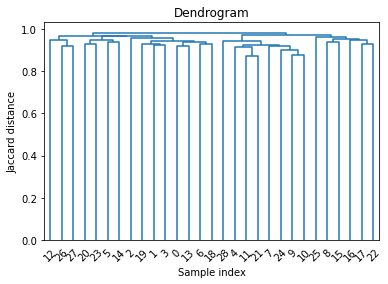

In [25]:
hierarchy.dendrogram(aqueous_jaccard_linkage)

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Jaccard distance')

In [ ]:
aqueous

In [7]:
help(hierarchy.dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children. The top of the U-link indicates a
    cluster merge. The two legs of the U-link indicate which clusters
    were merged. The length of the two legs of the U-link represents
    the distance between the child clusters. It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
        Th

In [ ]:
hierarchy.linkage()